In [5]:
from scipy import stats
from functions import *
from tqdm.notebook import tqdm

In [2]:
def scenario0_bids(k,n,v_in_sub_,v_out_) :
    """
    Every player is non-cooperative and plays the NE, (n-1)/n of its value
    """
    return (n-1)/n*v_in_sub_[:,-1], (n-1)/n*v_out_

def scenario1_bids(k,n,v_in_sub_,v_out_) :
    """
    The marketplace is bidding second highest report, a countercoallition is playing strategically
    """
    strat = lambda v: BR_f_OPTIMIZE(v,stats.beta(a=k-1,b=2))
    return v_in_sub_[:,-2], np.array([strat(v) for v in  v_out_])

def scenario2_bids(k,n,v_in_sub_,v_out_) :
    """
    The marketplace is playing against a coutercoallition, both plays strategically the NE
    """
    out = marshall1_close_form_boundary(k,n-k)
    v_in_ = v_in_sub_[:,-1]
    return np.array([bid1_f(v,out) for v in  v_in_]),np.array([bid2_f(v,out) for v in  v_out_])

def scenario3_bids(k,n,v_in_sub_,v_out_) :
    """
    The marketplace is playing against individuals, each bidder is strategic and plays the NE
    """
    out = marshall2_iterative_find_boundary_CUSTOM(k,n-k,eps=10**-3)
    v_in_ = v_in_sub_[:,-1]
    return np.array([bid1_f(v,out) for v in  v_in_]),np.array([bid2_f(v,out) for v in  v_out_])

### Marshall1994, Table III

In [11]:
batch_size = 5_000

#k = 10
#n_ = np.linspace(k+1,k+1000,100)
n = 50
k_ = np.arange(2,n)

scenarios_ = [{'auct':[],'in':[],'out':[]} for _ in range(4)]

for k in tqdm(k_) :
    v_out_ = stats.beta(a=n-k,b=1).rvs(size=batch_size)
    v_in_sub_ = np.sort(stats.uniform().rvs(size=batch_size*k).reshape(batch_size,k))[:,-2:]
    v_in_ = v_in_sub_[:,-1]
    
    b_in_, b_out_ = scenario1_bids(k,n,v_in_sub_,v_out_)
    scenarios_[1]['auct'].append(np.mean(np.maximum(b_in_,b_out_)))
    scenarios_[1]['in'].append(np.mean((v_in_-b_in_)*(b_in_>=b_out_))/k)
    scenarios_[1]['out'].append(np.mean((v_out_-b_out_)*(b_out_>=b_in_))/(n-k))
    
    b_in_, b_out_ = scenario2_bids(k,n,v_in_sub_,v_out_)
    scenarios_[2]['auct'].append(np.mean(np.maximum(b_in_,b_out_)))
    scenarios_[2]['in'].append(np.mean((v_in_-b_in_)*(b_in_>=b_out_))/k)
    scenarios_[2]['out'].append(np.mean((v_out_-b_out_)*(b_out_>=b_in_))/(n-k))
        
    b_in_, b_out_ = scenario3_bids(k,n,v_in_sub_,v_out_)
    scenarios_[3]['auct'].append(np.mean(np.maximum(b_in_,b_out_)))
    scenarios_[3]['in'].append(np.mean((v_in_-b_in_)*(b_in_>=b_out_))/k)
    scenarios_[3]['out'].append(np.mean((v_out_-b_out_)*(b_out_>=b_in_))/(n-k))

  0%|          | 0/48 [00:00<?, ?it/s]

/var/folders/w6/qnfy53vx38z4f62nwwt31fr40000gn/T/ipykernel_49363/4032464733.py:19: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim((0,0.5*10**-3))


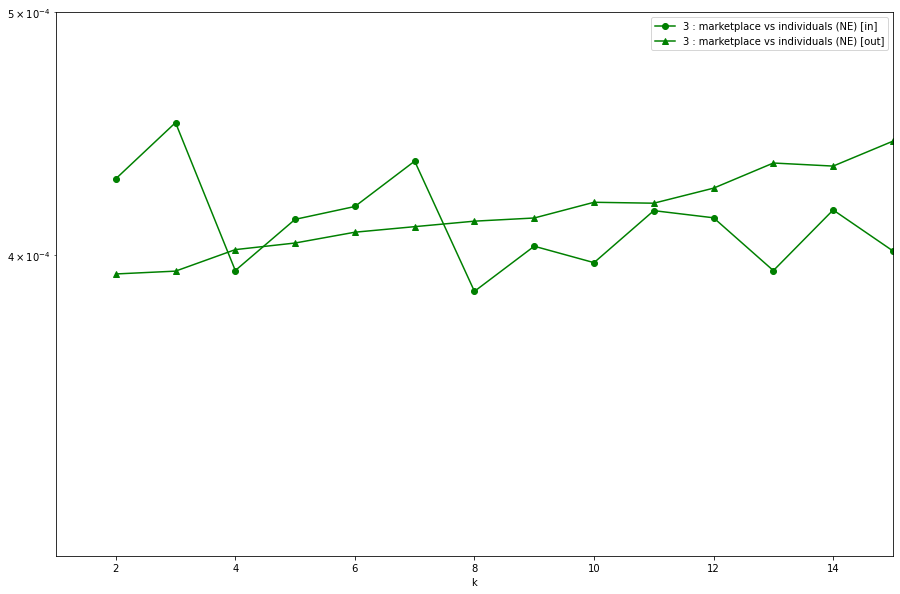

In [12]:
plt.figure(figsize=(15,10))
plt.xlabel("k")

#plt.semilogy(k_,0*k_+1/(n*(n+1)),'-',color='gray',label="0 : No marketplace (NE) [in/out]")
#plt.semilogy(k_,scenarios_[1]['in'],'-o',color='red',label=r"1 : $r_{(2)}$ marketplace vs countercoallition [in]")
#plt.semilogy(k_,scenarios_[2]['in'],'-o',color='blue',label=r"2 : marketplace vs countercoallition (NE) [in]")
plt.semilogy(k_,scenarios_[3]['in'],'-o',color='green',label=r"3 : marketplace vs individuals (NE) [in]")

#plt.semilogy(k_,scenarios_[1]['out'],'-^',color='red',label=r"1 : $r_{(2)}$ marketplace vs countercoallition [out]")
#plt.semilogy(k_,scenarios_[2]['out'],'-^',color='blue',label=r"2 : marketplace vs countercoallition (NE) [out]")
plt.semilogy(k_,scenarios_[3]['out'],'-^',color='green',label=r"3 : marketplace vs individuals (NE) [out]")

#plt.semilogy(k_,0*k_+(n-1)/(n+1),'-',color='gray',label="0 : No marketplace (NE) [auct]")

#plt.semilogy(k_,scenarios_[1]['auct'],'-+',color='red',label=r"1 : $r_{(2)}$ marketplace vs countercoallition [auct]")
#plt.semilogy(k_,scenarios_[2]['auct'],'-+',color='blue',label=r"2 : marketplace vs countercoallition (NE) [auct]")
#plt.semilogy(k_,scenarios_[3]['auct'],'-+',color='green',label=r"3 : marketplace vs individuals (NE) [auct]")
plt.xlim((1,15))
plt.ylim((0,0.5*10**-3))
plt.legend()
plt.show()